In [1]:
"""
1. Import Global Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

np.random.seed(0)

In [2]:
"""
2. Logistic Regression
Source: Week 6 Notebook
"""

import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

np.set_printoptions(precision=4, suppress=True)


In [40]:
"""
3. Load Subsetted that was created in EDA notebook and target error from raw zillow file
Note to Sullivan: I had to reverse the slashes from back to forward to work
"""

# Load the pre-subsetted data
train_data = pd.read_csv('../Data/subsetted/training_data_processed.csv', sep=',', engine='python')

# Load the label data
train_target = pd.read_csv('../Data/subsetted/training_labels_processed.csv', sep=',', engine='python')
train_target_bin = pd.read_csv('../Data/subsetted/training_labels_bin_processed.csv', sep=',', engine='python')

In [41]:
# 3. Check the data

# 3.1 Data shape
# Check the shape of the data
print("Train data shape:", train_data.shape)

# Check the shape of the targets
print("Label data shape:", train_target.shape)
print("Binarized label data shape:", train_target_bin.shape)

print(train_data.describe)
print(train_target.describe)
print(train_target_bin.describe)


Train data shape: (167854, 36)
Label data shape: (167854, 1)
Binarized label data shape: (167854, 1)
<bound method NDFrame.describe of         airconditioningtypeid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0                         1.0          2.0         3.0                    4.0   
1                        -9.0          3.5         4.0                   -9.0   
2                         1.0          3.0         2.0                    4.0   
3                         1.0          2.0         2.0                    4.0   
4                        -9.0          2.5         4.0                   -9.0   
5                         1.0          4.0         4.0                    1.0   
6                        -9.0          1.0         2.0                    7.0   
7                        -9.0          2.5         3.0                   -9.0   
8                        -9.0          1.0         2.0                   -9.0   
9                        -9.0          2.0         2.0 

In [42]:
# 4. Prep the data

# 4.1 Remove non int or float columns - Moved to Preprocessing_Clean Notebook
# train_data_2016 = train_data_2016.select_dtypes(['float64','int64'])

# 4.2 Remove columns from the data matrix that contain Nan values - Moved to Preprocessing_Clean Notebook
# train_data_2016 = train_data_2016.dropna(axis=1, how='any')
# If we'd rather just remove rows with a Nan, we'd need to change the axis to 0


print('data shape: ', train_data.shape)
print('labels shape: ', train_target.shape)
#train_data = train_data.drop([0,0])

# 4.3 Set the X, Y, and Y(binarized labels) variables
X, Y, Yb = np.asarray(train_data), np.asarray(train_target), np.asarray(train_target_bin)
#Y, Yb = Y.reshape((167853,)), Yb.reshape((167853,))

print('data shape: ', X.shape)
print('labels shape: ', Y.shape)

# 4.4 Shuffle the variables
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y, Yb = X[shuffle], Y[shuffle], Yb[shuffle]
Y_1d, Yb_1d = np.ravel(Y), np.ravel(Yb)

print('data shape: ', X.shape)
print('target shape: ', Y.shape)
print('target (binarized) shape: ', Yb.shape)

# # 4.5 Create different arrays for training and testing data.
train_data, train_labels, train_labels_bin = X[:130000], Y_1d[:130000], Yb_1d[:130000]
mini_train_data, mini_train_labels, mini_train_labels_bin = X[:1000], Y_1d[:1000], Yb_1d[:1000]
mini_train_labels2, mini_train_labels_bin2 = Y[:1000], Yb[:1000]
test_data, test_labels, test_labels_bin = X[130000:], Y[130000:], Yb[130000:]

print(test_data.shape)

data shape:  (167854, 36)
labels shape:  (167854, 1)
data shape:  (167854, 36)
labels shape:  (167854, 1)
data shape:  (167854, 36)
target shape:  (167854, 1)
target (binarized) shape:  (167854, 1)
(37854, 36)


In [43]:
# 5. Create, fit the Logistic Regression classifier

# 5.1 Create and fit
logr =  LogisticRegression()
logr.fit(train_data, train_labels_bin)

# 5.2 Print the resulting model
print('Estimated intercept:', logr.intercept_)

print('Estimated coefficients:', logr.coef_)

Estimated intercept: [0.]
Estimated coefficients: [[ 0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0. -0.  0.
   0.  0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0.]]
130000


Mean Squared Error:  0.43702451412338644
Variance Score:  0.5630052306229196


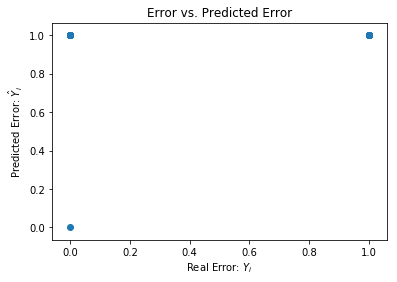

In [44]:
# 6. Test the accuracy of the classifier

# Start by plotting the train labels against the predicted data 
plt.scatter(test_labels_bin, logr.predict(test_data))
plt.xlabel("Real Error: $Y_i$")
plt.ylabel("Predicted Error: $\hat{Y}_i$")
plt.title("Error vs. Predicted Error")

# Calculate the mean square error
mse = np.mean((logr.predict(test_data)-test_labels_bin)**2)
print('Mean Squared Error: ', mse)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
var_score = logr.score(test_data, test_labels_bin)
print('Variance Score: ', var_score)
        